# CNN Model for MNIST Handwritten Digit Classification

- This is adapted from the tutorial of the MIT AI Research Scientist, Lex Fridman. It is the application of deep learning to make predictions on the MNIST dataset. So, we are to classify images of hand-written digits using Convolutional Neural Network Classifier. We will take one image out of the 70,000 images, at a resolution of 28 by 28 pixels, as input and predict the most likely digit in that image.

- So, we make the necessary imports — Tensorflow, Keras, Numpy and those for visualization.

In [17]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

In [19]:


# loading Mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


In [20]:
#  save it to file  on folder keras in train and test

X_train.tofile('Keras/Train/X_train')
X_test.tofile('Keras/Test/X_test')

y_train.tofile('Keras/Test/y_train')
y_test.tofile('Keras/Test/y_test')

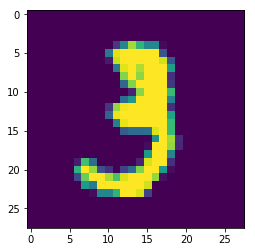

In [21]:
# visualize one digit from dataset

plt.imshow(X_train[10,:,:])

In [22]:


# mnist images are 28x28 pixels and we need to convert it to 1D array , which mean 1, 784 pixels  (28*28=784)


print (X_train.shape)

ndims = X_train.shape[1] * X_train.shape[2]
print (ndims)



# adding 
X_train = X_train.reshape(X_train.shape[0], ndims)

X_test = X_test.reshape(X_test.shape[0], ndims)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)



(60000, 28, 28)
784
Training Shape: (60000, 784)
Testing Shape: (10000, 784)


In [23]:
# flatten our data into rows of 1D image arrays
# Next, we normalize our training data 


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [24]:


# convert y to categoriacal 

from keras.utils import to_categorical

print (y_train)

y_train = to_categorical(y_train)

y_train

[5 0 4 ... 5 6 8]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
print (y_train[3])


# convert y_test to categorical

y_test=to_categorical(y_test)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Train ANN model

In [26]:
# Importing the Keras libraries and packages
from keras.models import Sequential     # making ANN and initialize
from keras.layers import Dropout  
from keras.layers import Dense  


In [156]:
# Add the first layer where the input dimensions are the 784 pixel values


model=Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(p=0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(p=0.1))
model.add(Dense(output_dim=10, activation ='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


In [157]:
# train model

model.fit(X_train,y_train,shuffle=True, epochs=50, batch_size=15)

Epoch 1/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.2572 - acc: 0.9240
Epoch 2/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1232 - acc: 0.9623
Epoch 3/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.0974 - acc: 0.9695
Epoch 4/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.0824 - acc: 0.9750
Epoch 5/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.0711 - acc: 0.9769
Epoch 6/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.0657 - acc: 0.9795
Epoch 7/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.0581 - acc: 0.9815
Epoch 8/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0532 - acc: 0.9830
Epoch 9/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.0489 - acc: 0.9843
Epoch 10/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0469 - 

In [158]:
# evaluate model

model.evaluate(X_test , y_test , batch_size=20)

10000/10000 [==============================] - 0s 33us/step


[0.11429921004459737, 0.9804999960660934]

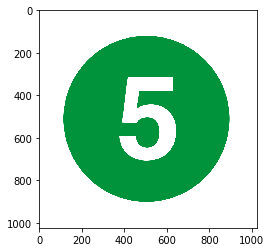

In [159]:


# check the model
from PIL import Image

pic=Image.open('../Resource/5.png')

plt.imshow(pic)

In [160]:
# convert image to array

from keras.preprocessing.image import img_to_array


Pic=img_to_array(pic)

print (Pic.shape)


(1024, 1024, 4)


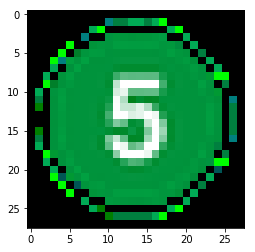

In [182]:


# Mnist dataset are 28*28 pixel we need to resize image to 28*28 then convert to array

from PIL import Image

from resizeimage import resizeimage

pic=Image.open('../Resource/5.png')


Pic=resizeimage.resize_contain(pic, [28,28])


plt.imshow(Pic)

In [183]:
# convert image to array

# array has 3 dimensions for RBG but we only use B/W for this model so we use im[:,:,0]
from keras.preprocessing.image import img_to_array


Pic=img_to_array(Pic)

print (Pic.shape)

(28, 28, 3)


In [184]:
# now we need to convert array to 1D array and test model

# onyly check with one color
Test_pic=Pic[:,:,0]


print (Test_pic.shape)


Test_pic=Test_pic.reshape(1,28*28)

print (Test_pic.shape)

(28, 28)
(1, 784)


In [185]:
Test_pic=Pic.reshape(3,28*28)

print (Test_pic.shape)

(3, 784)


In [189]:
# test the model

# before testing we need to use scaler

Test= scaler.transform(Test_pic)

print (Test.shape)

model.predict_classes(Test)[1]

(3, 784)


5

4


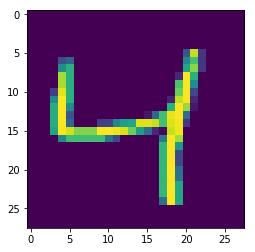

In [180]:
# array 4 is number 5

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (y_train[2])

plt.imshow(X_train[2,:,:])

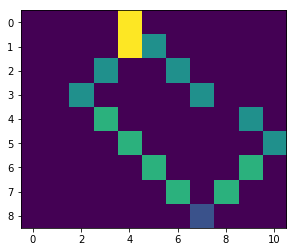

In [190]:
a=np.array([[0,0,0,0,400,0,0,0,0,0,0],
            [0,0,0,0,400,200,0,0,0,0,0],
            [0,0,0,200,0,0,200,0,0,0,0],
            [0,0,200,0,0,0,0,200,0,0,0],
            [0,0,0,256,0,0,0,0,0,200,0],
            [0,0,0,0,256,0,0,0,0,0,200],
            [0,0,0,0,0,256,0,0,0,256,0],
            [0,0,0,0,0,0,256,0,256,0,0],
            [0,0,0,0,0,0,0,200,0,0,0]])
plt.imshow(a)

In [195]:
plt.imshow(np.zeros(28,28))

TypeError: data type not understood

In [198]:
np.zeros((28,28))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0